<div style="text-align: right"><b> Ana Valentina López Chacón </b></div>
<div style="text-align: right"><b> Reconocimiento de Formas, 2024 - 2025 </b></div>

## **Clasificación de Animales: MLP con Keras**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import keras
import tensorflow as tf
import os
import numpy as np
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.utils import to_categorical
keras.utils.set_random_seed(23)

Realizamos la lectura de los datos.

In [2]:
dataset_path = '/kaggle/input/animals10/raw-img'

IMG_SIZE = (64, 64)
BATCH_SIZE = 32
num_clases = 10

train_dataset = image_dataset_from_directory(
    dataset_path,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int',
    shuffle=True,
    validation_split=0.2,
    subset='training',
    seed=123
)

test_dataset = image_dataset_from_directory(
    dataset_path,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int',
    shuffle=True,
    validation_split=0.2,
    subset='validation',
    seed=123
)

validation_split = 0.25  
num_validation_batches = int(validation_split * len(train_dataset)) #.file_paths
validation_dataset = train_dataset.take(num_validation_batches)
train_dataset = train_dataset.skip(num_validation_batches)

Found 26179 files belonging to 10 classes.
Using 20944 files for training.
Found 26179 files belonging to 10 classes.
Using 5235 files for validation.


Creamos el modelo.

In [3]:
input_dim = IMG_SIZE[0] * IMG_SIZE[1] * 3  # 64 * 64 * 3 = 12288

M = keras.Sequential([keras.Input(shape=(64,64,3)),
    keras.layers.Rescaling(scale = 1/255),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dense(num_clases, activation='softmax')
])
M.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    50,335,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,376,714 (192.17 MB)

 Trainable params: 50,376,714 (192.17 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
M.compile(loss="SparseCategoricalCrossentropy", optimizer="adam", metrics=["SparseCategoricalAccuracy"])
H = M.fit(train_dataset, batch_size = BATCH_SIZE, epochs = 30, verbose = 1, validation_data=validation_dataset)

Epoch 1/30


I0000 00:00:1729647472.070914     105 service.cc:145] XLA service 0x7e5930006420 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729647472.070980     105 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1729647472.070987     105 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 11/492 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - SparseCategoricalAccuracy: 0.1457 - loss: 48.9363  

I0000 00:00:1729647473.425389     105 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


492/492 ━━━━━━━━━━━━━━━━━━━━ 44s 66ms/step - SparseCategoricalAccuracy: 0.1939 - loss: 8.9471 - val_SparseCategoricalAccuracy: 0.2596 - val_loss: 2.1827
Epoch 2/30
492/492 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - SparseCategoricalAccuracy: 0.2779 - loss: 2.0139 - val_SparseCategoricalAccuracy: 0.3229 - val_loss: 1.9535
Epoch 3/30
492/492 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - SparseCategoricalAccuracy: 0.3153 - loss: 1.9390 - val_SparseCategoricalAccuracy: 0.3215 - val_loss: 1.9373
Epoch 4/30
492/492 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - SparseCategoricalAccuracy: 0.3259 - loss: 1.8847 - val_SparseCategoricalAccuracy: 0.3330 - val_loss: 1.9090
Epoch 5/30
492/492 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - SparseCategoricalAccuracy: 0.3432 - loss: 1.8563 - val_SparseCategoricalAccuracy: 0.3246 - val_loss: 1.9106
Epoch 6/30
492/492 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - SparseCategoricalAccuracy: 0.3504 - loss: 1.8386 - val_SparseCategoricalAccuracy: 0.3192 - val_loss: 2.0229
Epoch 7/30
492/492 ━━━━━━━━

Realizamos la gráfica para losses, accuracy, matriz de confusión y reporte de clasificación.

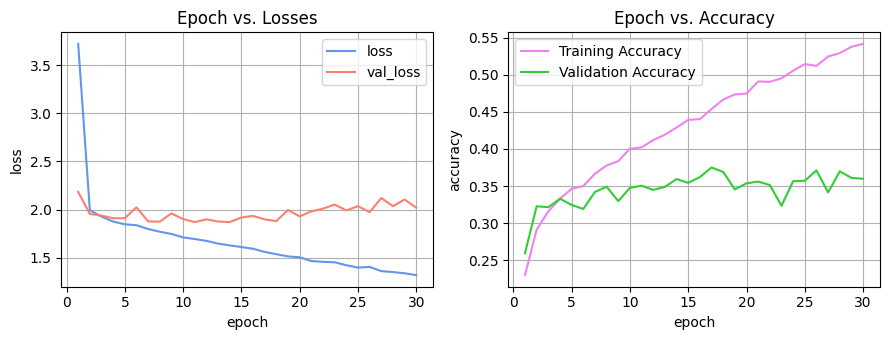

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(9, 3.5))
xx = np.arange(1, len(H.history['loss'])+1)
ax = axes[0]
ax.grid()
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.set_title("Epoch vs. Losses")
# ax.set_xticks(xx)
ax.plot(xx, H.history['loss'], label = 'loss', color='cornflowerblue')
ax.plot(xx, H.history['val_loss'], label = 'val_loss', color='salmon')
ax.legend()

ax = axes[1]
ax.grid()
ax.set_xlabel('epoch')
ax.set_ylabel('accuracy')
ax.set_title("Epoch vs. Accuracy")
# ax.set_xticks(xx)
ax.plot(xx, H.history['SparseCategoricalAccuracy'], label='Training Accuracy', color='violet')
ax.plot(xx, H.history['val_SparseCategoricalAccuracy'], label='Validation Accuracy', color = 'limegreen')
ax.legend()
plt.tight_layout()


In [6]:
score = M.evaluate(test_dataset, verbose=0)
print(f'Loss: {score[0]:.4}\nPrecisión: {score[1]:.1%}')

Loss: 1.992
Precisión: 36.6%


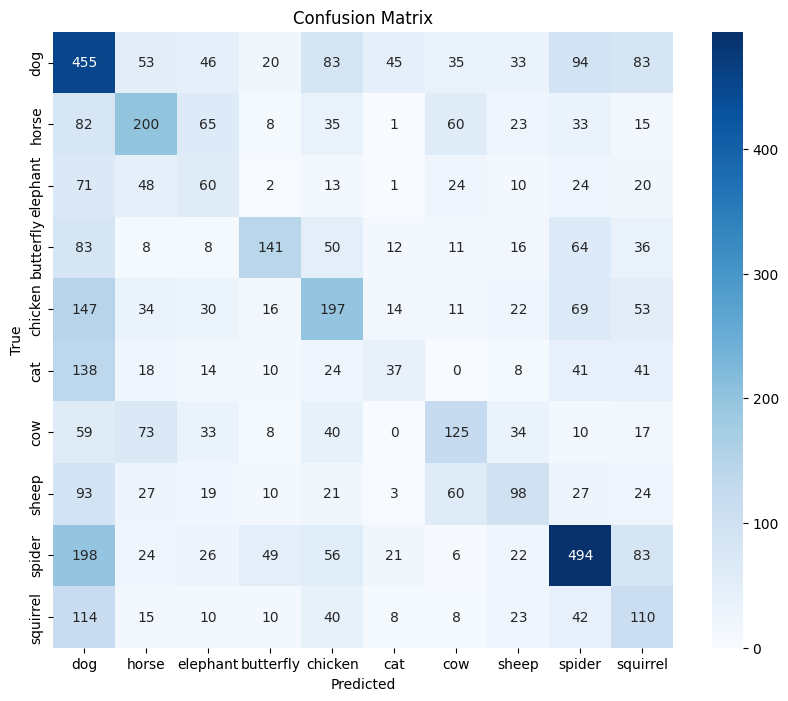

              precision    recall  f1-score   support

         dog       0.32      0.48      0.38       947
       horse       0.40      0.38      0.39       522
    elephant       0.19      0.22      0.21       273
   butterfly       0.51      0.33      0.40       429
     chicken       0.35      0.33      0.34       593
         cat       0.26      0.11      0.16       331
         cow       0.37      0.31      0.34       399
       sheep       0.34      0.26      0.29       382
      spider       0.55      0.50      0.53       979
    squirrel       0.23      0.29      0.26       380

    accuracy                           0.37      5235
   macro avg       0.35      0.32      0.33      5235
weighted avg       0.38      0.37      0.36      5235



In [7]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def get_labels_and_predictions(dataset, model):
    true_labels = []
    predictions = []

    for images, labels in dataset:
        preds = model.predict(images, verbose = 0)
        predicted_classes = np.argmax(preds, axis=1)
        true_labels.extend(labels.numpy())
        predictions.extend(predicted_classes)

    return np.array(true_labels), np.array(predictions)

true_labels, predicted_labels = get_labels_and_predictions(test_dataset, M)

conf_matrix = confusion_matrix(true_labels, predicted_labels)

translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken",
              "gatto": "cat", "mucca": "cow", "pecora": "sheep", "ragno": "spider", "scoiattolo": "squirrel"}
class_names = [translate[i] for i in test_dataset.class_names]

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels = class_names, yticklabels = class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(true_labels, predicted_labels, target_names = class_names))

## **Resumen de Resultados**

- Con el MLP sencillo obtenemos una precisión del 36.6%. Contando solo con una capa densa es normal que los resultados queden estancados en este valor, además que al trbajar con imagenes es necesario aplicar capas convolucionales para ver mejoras considerables.